In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load CSV file
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
# Rename columns
df = df.rename(columns={'Age_08_04': 'Age', 'HP': 'HP', 'Doors': 'Doors', 'Price': 'Price'})

In [4]:
# Select relevant columns
data = df[['Price', 'Age', 'HP', 'Doors']]

In [5]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Price    0
Age      0
HP       0
Doors    0
dtype: int64


In [6]:
# Descriptive Statistics
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
               Price          Age           HP        Doors
count   1436.000000  1436.000000  1436.000000  1436.000000
mean   10730.824513    55.947075   101.502089     4.033426
std     3626.964585    18.599988    14.981080     0.952677
min     4350.000000     1.000000    69.000000     2.000000
25%     8450.000000    44.000000    90.000000     3.000000
50%     9900.000000    61.000000   110.000000     4.000000
75%    11950.000000    70.000000   110.000000     5.000000
max    32500.000000    80.000000   192.000000     5.000000


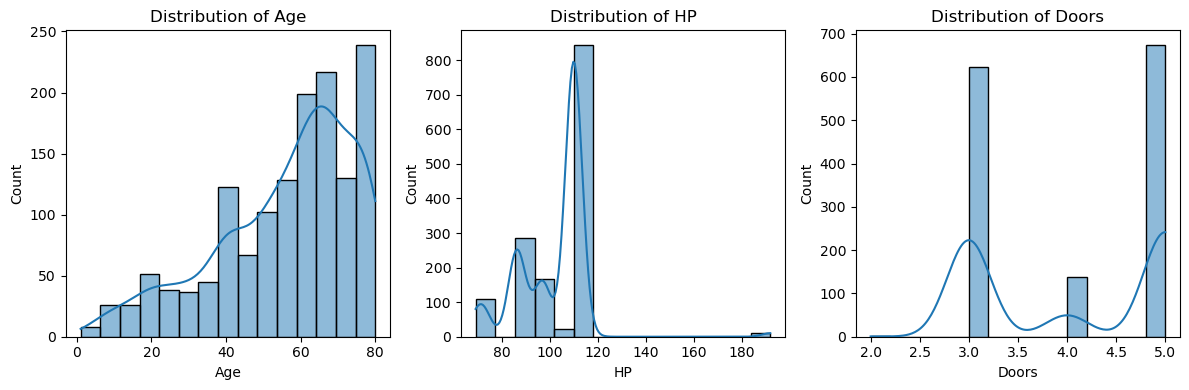

In [7]:
# Data Visualization
plt.figure(figsize=(12, 4))
for idx, col in enumerate(['Age', 'HP', 'Doors']):
    plt.subplot(1, 3, idx + 1)
    sns.histplot(data[col], bins=15, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

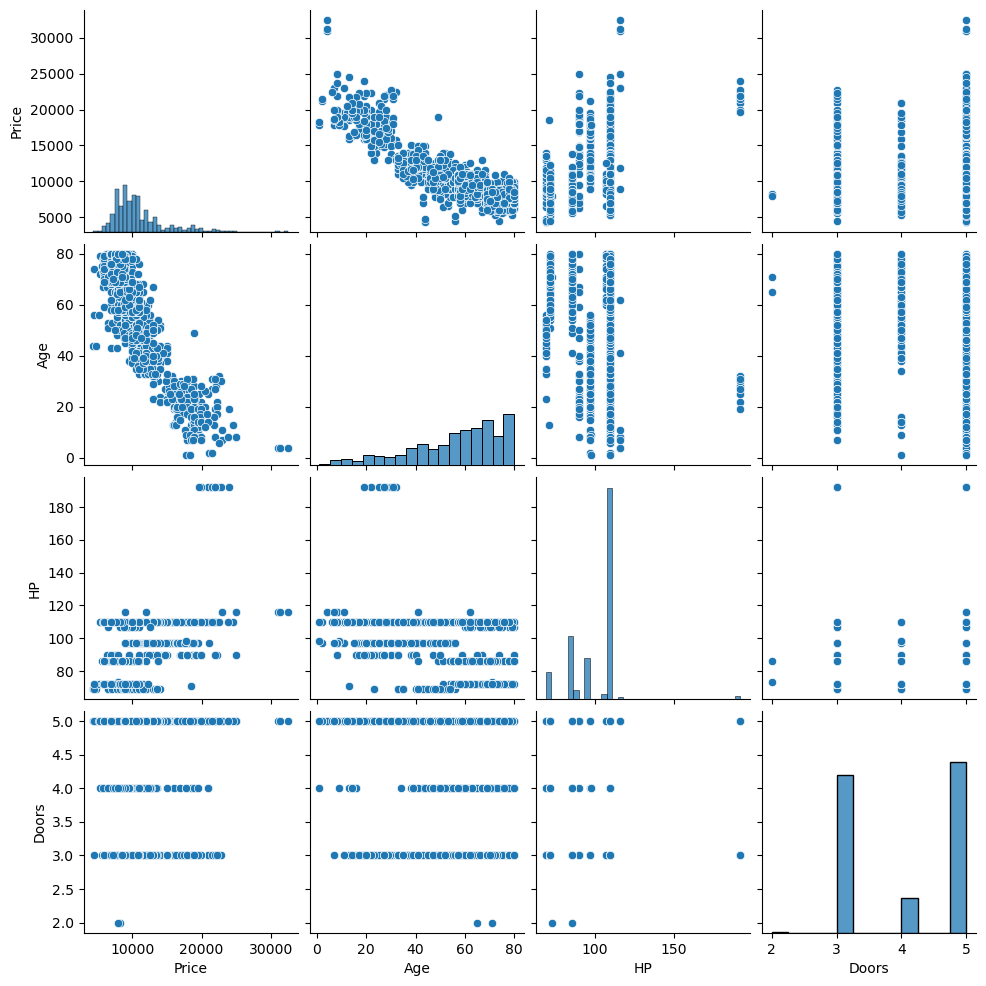

In [8]:
sns.pairplot(data)
plt.show()


Correlation Matrix:
           Price       Age        HP     Doors
Price  1.000000 -0.876590  0.314990  0.185326
Age   -0.876590  1.000000 -0.156622 -0.148359
HP     0.314990 -0.156622  1.000000  0.092424
Doors  0.185326 -0.148359  0.092424  1.000000


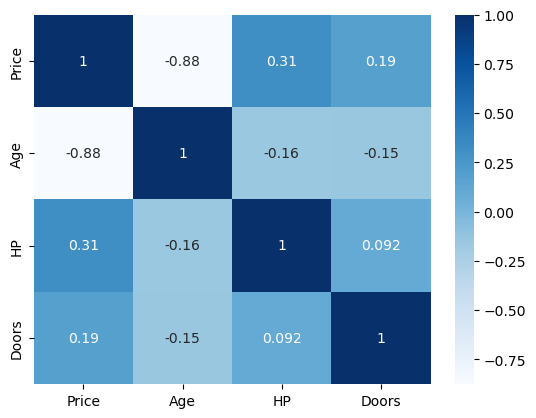

In [9]:
print("\nCorrelation Matrix:\n", data.corr())
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

In [10]:
# Train-Test Split
X = data[['Age', 'HP', 'Doors']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 1148
Test size: 288


In [11]:
# Model 1: All Features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print("Model 1 (All Features)")
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

Model 1 (All Features)
Intercept: 14942.274612887271
Coefficients: [-163.1297313    41.77208896  170.33786371]


In [12]:
# Feature Selection: VIF & p-values
X_const = sm.add_constant(X)  # add intercept for OLS
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]
print(vif_data)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

  Feature        VIF
0   const  81.771559
1     Age   1.044506
2      HP   1.030317
3   Doors   1.027662
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1941.
Date:                Thu, 04 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:53:21   Log-Likelihood:                -12642.
No. Observations:                1436   AIC:                         2.529e+04
Df Residuals:                    1432   BIC:                         2.531e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [13]:
# Identify weak feature from p-values or high VIF
# (Assume 'Doors' is weak if p > 0.05 or VIF is high)

In [14]:
# Model 2: Remove Weak Feature (Doors)
X2 = data[['Age', 'HP']]  # Removed Doors
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)
print("Model 2 (Age, HP only)")
print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_)

Model 2 (Age, HP only)
Intercept: 15630.493637170715
Coefficients: [-164.2343857    42.37772386]


In [15]:
# Model 3: Compare Models
def print_metrics(y_true, y_pred, title=''):
    print(title)
    print("R2 Score :", r2_score(y_true, y_pred))
    print("RMSE     :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE      :", mean_absolute_error(y_true, y_pred))
    print()
print_metrics(y_test, y_pred1, "Model 1 (All Features)")
print_metrics(y2_test, y_pred2, "Model 2 (Age, HP only)")

Model 1 (All Features)
R2 Score : 0.8018936089034632
RMSE     : 1625.8203298608648
MAE      : 1149.187667186895

Model 2 (Age, HP only)
R2 Score : 0.8003162522431764
RMSE     : 1632.2800255588209
MAE      : 1156.7550787546247



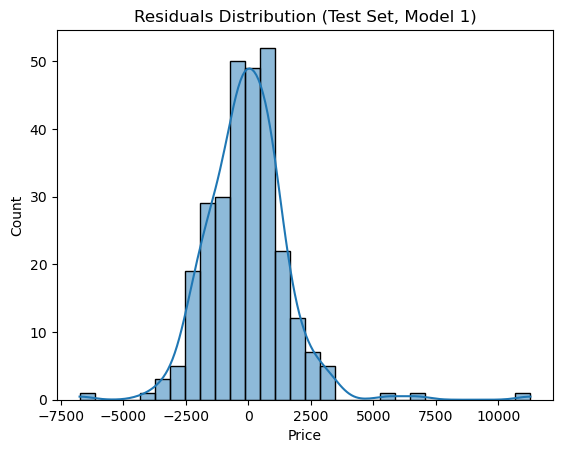

In [16]:
# Residual Analysis for Main Model
residuals = y_test - y_pred1
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Test Set, Model 1)")
plt.show()

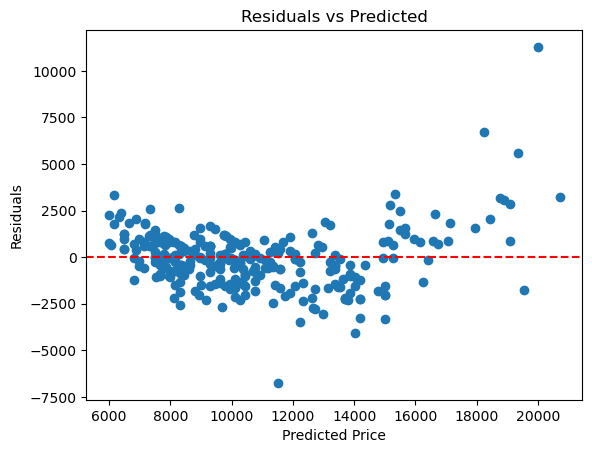

Shapiro-Wilk Test p-value: 0.0000


In [17]:
#scatter plot
plt.scatter(y_pred1, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {p:.4f}")

In [18]:
# Ridge & Lasso Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

In [20]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

In [21]:
print("Ridge Coefficients:", ridge.coef_)
print_metrics(y_test, ridge_pred, "Ridge Regression")

Ridge Coefficients: [-3058.33650878   619.76030955   162.5413822 ]
Ridge Regression
R2 Score : 0.8018447017351036
RMSE     : 1626.0210032497298
MAE      : 1149.1239896942259



In [22]:
print("Lasso Coefficients:", lasso.coef_)
print_metrics(y_test, lasso_pred, "Lasso Regression")

Lasso Coefficients: [-3060.24192361   619.08911983   161.47377758]
Lasso Regression
R2 Score : 0.8018628004523763
RMSE     : 1625.9467444065765
MAE      : 1149.0855001128502



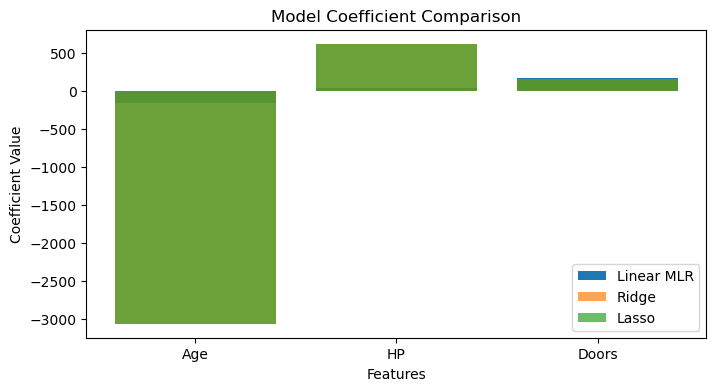

In [23]:
# Coefficient Comparison
plt.figure(figsize=(8, 4))
names = X.columns
plt.bar(names, model1.coef_, label='Linear MLR')
plt.bar(names, ridge.coef_, label='Ridge', alpha=0.7)
plt.bar(names, lasso.coef_, label='Lasso', alpha=0.7)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Model Coefficient Comparison")
plt.show()

In [24]:
#### Conclusion ####
##Model 1: 
        #Built using all features (Age, HP, Doors).
##Feature Selection: 
        #Based on the VIF table and OLS summary, the feature Doors was found to be insignificant (high p-value / very low coefficient impact).
##Model 2: 
        #The model was rebuilt after removing the weak feature (Doors).
##Model Comparison:
        #The R² value showed only a slight change. If it remains almost the same, it indicates that Doors had a negligible impact on the prediction.
        #RMSE and MAE values were compared across models to evaluate whether accuracy improved or remained stable.
#Final Note:
        #Removing weak features simplifies the model, reduces multicollinearity, and improves interpretability without sacrificing much predictive power.

In [25]:
#### Thanks You ###